In [1]:
import duckduckgo_search, time, json

In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

In [3]:
def find_image(keywords, max_images=200):
    return L(DDGS().images(keywords,max_results=max_images, 
                           # safesearch='off'
                           )).itemgot('image')

In [4]:
pesca= find_image('fish', max_images=5)

In [5]:
download_url(pesca[0], dest='fish.jpg')

Path('fish.jpg')

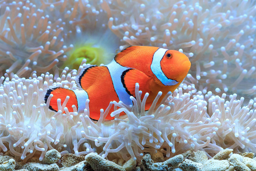

In [6]:
Image.open('fish.jpg').to_thumb(256,256)

In [7]:
fishes = "trout", "salmon", 'bass'
path = Path('fishes')

In [14]:
for b in fishes:
    dest = (path/b)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=find_image(f'{b} fish'))

In [15]:
failed =verify_images(get_image_files(path))
len(failed)
failed.map(Path.unlink)

(#22) [None,None,None,None,None,None,None,None,None,None...]

In [16]:
dls=DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items= get_image_files,
    splitter=RandomSplitter(seed=42, valid_pct=0.2),
    get_y= parent_label,
    item_tfms=[Resize(256)]
).dataloaders(path)

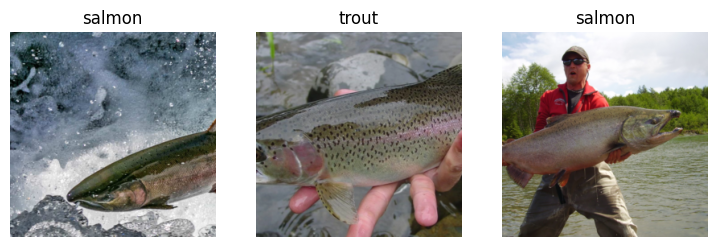

In [17]:
dls.show_batch(max_n=3)

In [18]:
learn=vision_learner(dls,resnet18, metrics=error_rate)

In [19]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.811018,1.536322,0.453488,00:51


C:\Users\piotr\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.805434,0.769406,0.279070,00:59
1,0.651862,0.542772,0.197674,01:05
2,0.490477,0.434736,0.127907,01:00
3,0.396156,0.381612,0.127907,01:04


In [20]:
thing,_,probs= learn.predict(PILImage.create('fish.jpg'))

In [21]:
probs, thing

(tensor([0.1005, 0.3332, 0.5663]), 'trout')

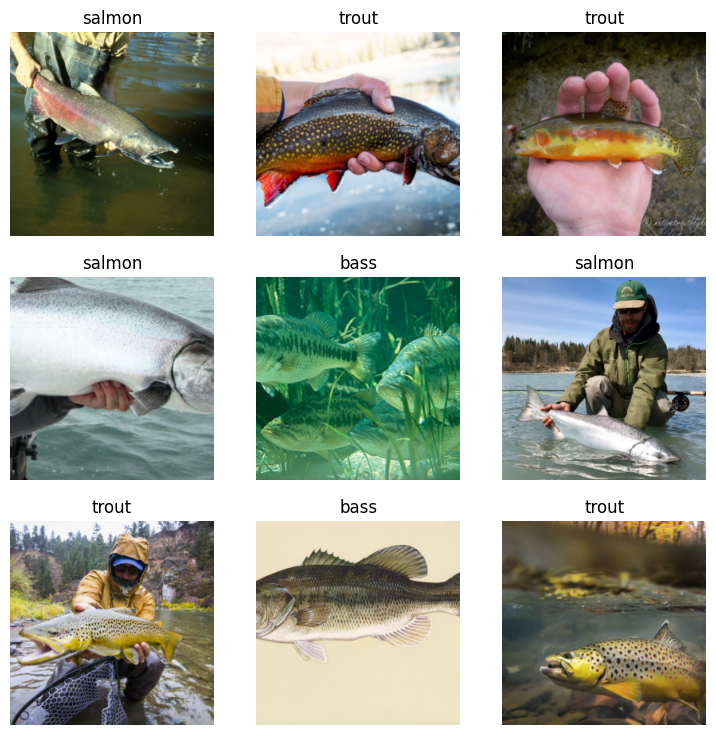

In [22]:
dls.valid.show_batch()